# Analysis of Vinho Verde red wine
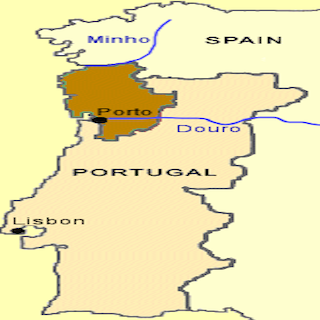




Farooq Hassan

October 23, 2019


# 1. Introduction.
 
The components of what makes a quality wine have been debated for hundreds of years, maybe even since the invention of wine production in 4,000 BC by the Armenians or the standardization of certain processes by the Romans in 80 BC.

My interest in wine stems from my time as a Director in the High Yield Group at UBS, where I had the opportunity to invest in two vineyards as part of my sector investments in our fund.

The process of making wine is as equally as important as the growing and harvesting of the grapes. 

Although it's difficult to use carbon dating to measure organic matter in soil, we can quantify production processes through the use of lab tests, we are able to measure 11 attributes of wine that result in a quality rating.

In particular, we are analyzing a red wine from Vinho verde. Vinho verde is a unique product from the Minho (Northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness. Red Vinho Verde wines are an intense red color, sometimes with a pink or bright red foam, and with a strong berry aroma. In the mouth it is intense and fresh, which allows it to pair well with food.

We are focused on determing whether the level of sulfites used in the wine making process is a meaningful contributor to the quality of the wine.

This may be beneficial for wine producers in determining the amount sulfites used in the wine making process in order to improve the quality of the wine.

A higher quality wine tends to command a higher price and higher gross margin for wine producers.

The audience will learn whether the sulphate levels in red wine bears any health concern as well how the level compares to other foods as the US requires the disclosure of sulfites in food.
 
In addition, the audience will learn about the process of making wine that affects the quality of the end product through quantitative analysis and testing. 

# What makes a good red wine? 
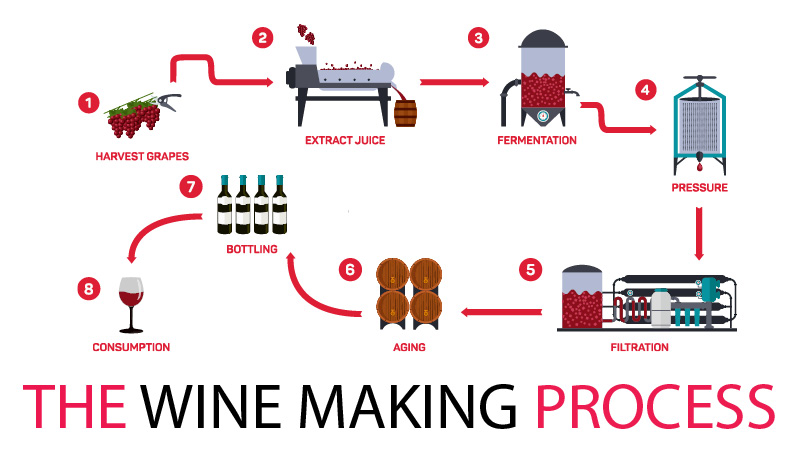 


# 2. Hypothesis
*Null*

Ho: There is no significant difference in the amount of sulfites between good quality and bad quality wines.

*Alternative*

Ha:  There is a significant difference in the amount of sulfites between good quality and bad quality wines.

# Sulfites are used in wines to extend shelf life
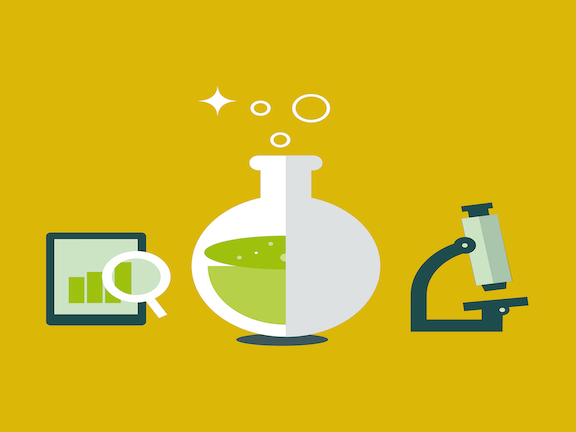

# 3. Data 

The data comes from the UCI Machine Learning Library(https://archive.ics.uci.edu/ml/datasets/Wine+Quality) and contains 1,599 observations and 12 variables. There a no missing values.

Data provided by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

There is no data available about grape types, wine brand or selling price due to privacy rights. The physicochemical (inputs) and sensory (the output) variables are available.

Attribute Information:
Input variables are continous while the output value is ordinal
1 - fixed acidity, 2 - volatile acidity, 3 - citric acid, 4 - residual sugar, 5 - chlorides, 6 - free sulfur dioxide, 7 - total sulfur dioxide, 8 - density, 9 - pH, 10 - sulfites, 11 - alcohol, 12 - quality (score between 0 and 10)

In [1]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv('https://raw.githubusercontent.com/qboy21/Thinkful/master/winequality-red.csv')

# View information
print(df.shape)
df.info()
df.head(10)

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [2]:
# Rename sulphates to sulfites as spelled in the US english language
df.rename(columns={'sulphates' : 'sulfites'},inplace=True)
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfites,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# View the unique values for each attribute
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulfites                 96
alcohol                  65
quality                   6
dtype: int64

In [4]:
# View the descriptive statistics on the output variable Quality
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [5]:
# View the descriptive statistics on the input variable sulfites
df['sulfites'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulfites, dtype: float64

# 4. Methods

For this analysis I will create two dataframes for the groups in order to test the amount of sulfites in good and bad quality rated wines. 

The first group are the good quality rated red wines and the second group are the bad quality rated red wines. 

Good wines are wines in the top quartile and Bad Wines are wines in the bottom quartile of the quality ranking.

sulfites are measured due to their importance in wine making. In particular sulfites are used to preserve wine and slow chemical reactions based on the amount of sugar, acidity and pH balance of the wine.

The distributions are non-normally distributed based on their histogram,skewness and kurtosis, I wil conduct an independent samples Kruskal-Wallis H test between the groups to measure if there is a significant difference in the level of sulfites between the two groups. 

In [6]:
# Split up the dataset
# Good quality wines are wines with a quality rating greater 6 (These are wines in the Top Quartile)
df_good_quality = df.loc[(df['quality'] >=7),'sulfites']

# Bad quality wines are wines with a quality rating less than 5 ((These are wines in the Bottom Quartile))
df_bad_quality = df.loc[(df['quality'] <=4),'sulfites']

print(df_good_quality.describe())
print(df_bad_quality.describe())

# View the descriptive statistics on our two groups used in testing and verify the sample sizes are adequate to reflect the population

count    217.000000
mean       0.743456
std        0.134038
min        0.390000
25%        0.650000
50%        0.740000
75%        0.820000
max        1.360000
Name: sulfites, dtype: float64
count    63.000000
mean      0.592222
std       0.224323
min       0.330000
25%       0.495000
50%       0.560000
75%       0.600000
max       2.000000
Name: sulfites, dtype: float64


# Good quality wines contain more sulfites

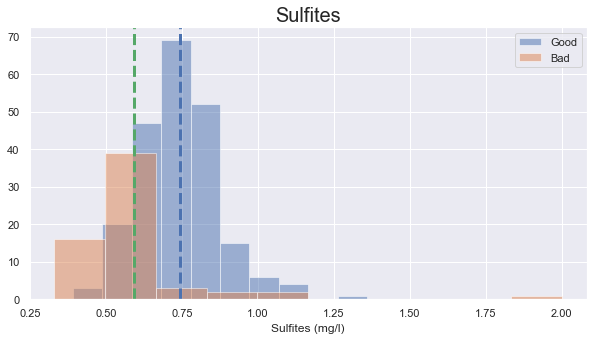

In [7]:
# Plot and provide the descriptive statistics for good and bad quality wines
plt.figure(figsize= (10,5))
plt.hist(df_good_quality, alpha = 0.5, label = 'Good')
plt.hist(df_bad_quality, alpha = 0.5, label = 'Bad')
plt.axvline(df_good_quality.mean(), color = 'b', linewidth = 3, linestyle = '--')
plt.axvline(df_bad_quality.mean(), color = 'g', linewidth = 3, linestyle = '--')
plt.legend()
plt.title('Sulfites', fontsize = 20)
plt.xlabel('Sulfites (mg/l)')
plt.show();
# The sulfites in parts per million for good quality wines are normally distributed by vizualization and descriptives statistics

There is a potential for sample bias based on what appears to be a few outliers in the bad quality wines. This potential bias may be eliminated by removing the outliers from the sample.

Also, observation bias may be present in the quality ranking as there may have been a difference in the conditions where the ranking was performed.

We could collect new data in this domain that included larger population. Then we can remove the outliers and generate random samples of good and bad wines in order to reduce sample bias. 

We could ensure the facilities where the the quality ranking are conducted are uniform to temperature, time of day and season.

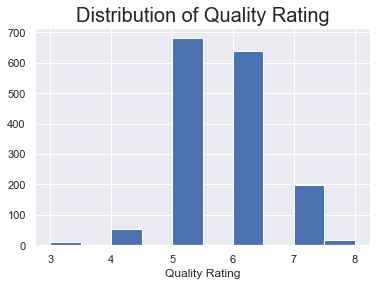

In [8]:
# Although quality is an ordinal value it is normally distributed
plt.hist(df['quality']);
plt.title('Distribution of Quality Rating', fontsize = 20);
plt.xlabel('Quality Rating');


In [9]:
stats.describe(df['quality'])

DescribeResult(nobs=1599, minmax=(3, 8), mean=5.6360225140712945, variance=0.6521683999934252, skewness=0.21759720553467285, kurtosis=0.2920311389729804)

# A statistical signficance in 
# the amount of sulfites in 
# Good and Bad Wines?

In [10]:
# The The sulfites in parts per million for bad quality wines are non- normally distributed by vizualization and descriptives statistics
print(stats.describe(df_good_quality))
print(stats.describe(df_bad_quality))

DescribeResult(nobs=217, minmax=(0.39, 1.36), mean=0.7434562211981566, variance=0.017966239972691585, skewness=0.6251508650313089, kurtosis=2.0109341817729005)
DescribeResult(nobs=63, minmax=(0.33, 2.0), mean=0.5922222222222221, variance=0.05032078853046597, skewness=4.3601916078509975, kurtosis=23.441127322842)


# Sim, Saúde
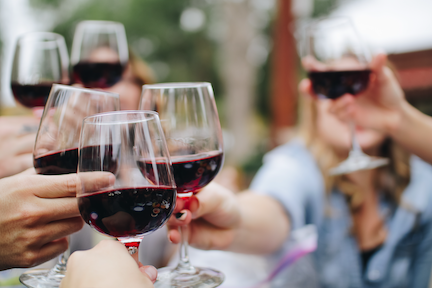

p < 0.01%


In [11]:
# Test for normalacy where p < .05
stats.normaltest(df['quality'])

NormaltestResult(statistic=17.26240081635554, pvalue=0.0001784503033385499)

# 5. Results
Basic on a visual inspection and descriptive statistics, the two groups are non-normally distributed. 

Therefore I proceeded with a The Kruskal-Wallis H test that can be used to determine if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable. . 

Based on a p-value of <.01%, I reject the null hypothesis that there is no significant difference in means of sulfites between good and bad quality red wines.

In [12]:
# Perform a Kruskal Wallis H-test by importing the function stats from the scipy libary for independent samples that are non-normally distributed
stats.kruskal(df_good_quality,df_bad_quality)

KruskalResult(statistic=71.67057888772801, pvalue=2.54296077117864e-17)

# 6. Discussion and recommendation

Based on the two groups for good and bad quality red Vinho verde wines, we measured the amount of sulfites in each group to determine whether the level of sulfites in wine results in a higher quality rating.

We rejected the Null hypothesis that there is no significant difference in the amount of sulfites in good and bad wines.

We can see that the greater amount of sulfites in wine leads to a higher quality ranking.

This informs us that the wines ability to age well after bottling is important to the perceived quality of the wine.

This information is helpful to wine producers in determining price for higher quality rated wines and maybe incorporated into their pricing matrix along with other factors specific to the area of distrubution.

Average selling price data based on region and quality ranking would enable wine producers to better optimize pricing based on these findings.

Furthermore, the amount of sulfites found in Vinho verde red wine is between 39mg/l and 200mg/l. Specifically good quality wines have 39mg/l to 136mg/l of sulfites whereas as bad quality wines have 33mg/l to 200mg/l. 

In the US, the maximium legal limit for red wines is 350mg/l and the maximum is 150mg/l in the European Union.

It can be inferred that some of the bad quality red wines would not be available for sale in the European Union. 

The European Union deems some bad quality red wines unsafe for consumption.

Contrary to current marketing and false beliefs, the amount of sulfites (maximum 350mg/l) in wine is considerably lower than the amount measured in meats (500mg/l), french fries (1,900mg/l) and dried fruits (3,600mg/l).

In future analysis, it would be interesting to see whether the amount of alcohol in wine results in a better quality rating as that effect is one of the major reasons for drinking wine.

# Wine producers can optimize pricing of wines
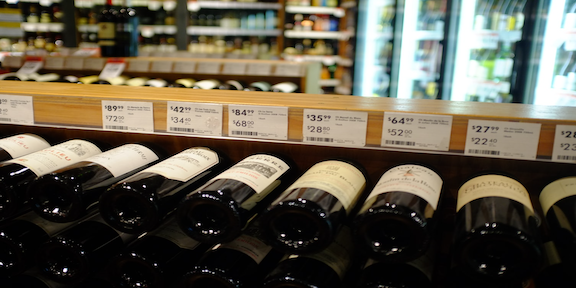

Good quality wines have a higher level of sulfites on average than bad quality wines.

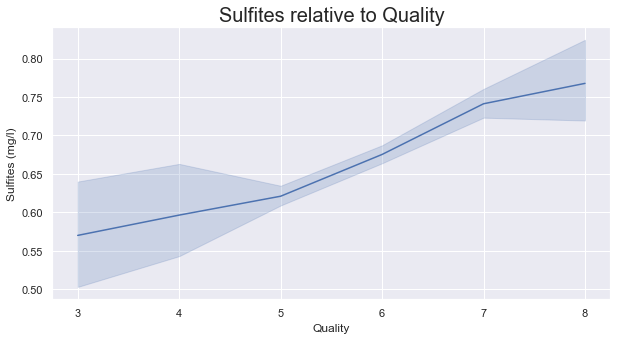

In [13]:
# Create a lineplot to view the higher level of sulfites found in good quality wines versus bad quality wines
plt.figure(figsize= (10,5))
sns.lineplot('quality','sulfites', data=df)
plt.title('Sulfites relative to Quality', fontsize = 20)
plt.xlabel('Quality')
plt.ylabel('Sulfites (mg/l)');

We can see that the variance in the level of sulfites found in higher quality wine is much more concentrated around the mean.

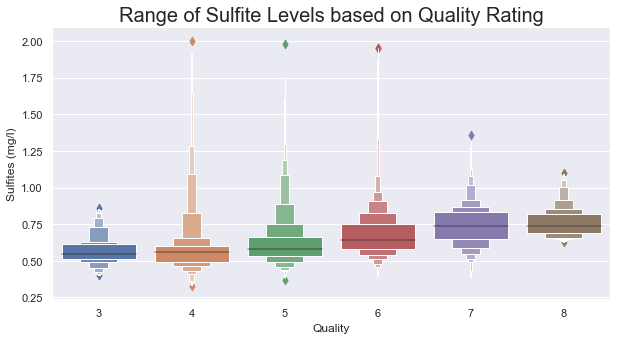

In [14]:
# Create boxplot to view the variance of the amount of sulfites based on the quality rating
plt.figure(figsize= (10,5))
sns.boxenplot('quality','sulfites', data =df)
plt.title('Range of Sulfite Levels based on Quality Rating', fontsize = 20)
plt.xlabel('Quality')
plt.ylabel('Sulfites (mg/l)');

We can visually see the quality rating of a wine increases as the alcohol percentage by volume increase.

# Questions



Contrary to current marketing and false beliefs, the amount of sulfites (maximum 350mg/l) in wine is considerably lower than the amount measured in meats (500mg/l), french fries (1,900mg/l) and dried fruits (3,600mg/l).

# Appendix



# The better the buzz.....

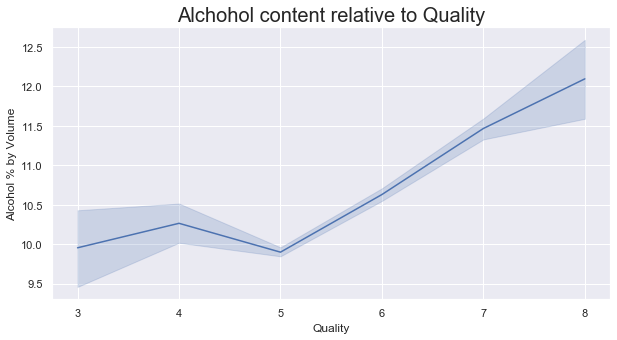

In [15]:
# Create a lineplot to view the higher level of alcohol found in good quality wines versus bad quality wines
plt.figure(figsize= (10,5))
sns.lineplot('quality','alcohol', data=df,err_style= 'band')
plt.title('Alchohol content relative to Quality', fontsize = 20)
plt.xlabel('Quality')
plt.ylabel('Alcohol % by Volume');


There is a significant statistical difference in the amount of alcohol found in good quality wines relative to bad quality wines.

In [16]:
# Good quality wines are wines with a quality rating greater 6 (These are wines in the Top Quartile)
df_good_quality_a = df.loc[(df['quality'] >6),'alcohol']

# Bad quality wines are wines with a quality rating less than 5 ((These are wines in the Bottom Quartile))
df_bad_quality_a = df.loc[(df['quality'] <5),'alcohol']

print(df_good_quality_a.describe())
print(df_bad_quality_a.describe())

count    217.000000
mean      11.518049
std        0.998153
min        9.200000
25%       10.800000
50%       11.600000
75%       12.200000
max       14.000000
Name: alcohol, dtype: float64
count    63.000000
mean     10.215873
std       0.918178
min       8.400000
25%       9.600000
50%      10.000000
75%      11.000000
max      13.100000
Name: alcohol, dtype: float64


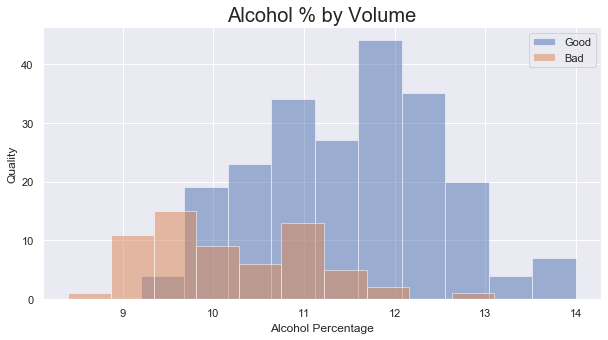

In [17]:
# Plot and provide the descriptive statistics for good and bad quality wines using alcohol as the input
plt.figure(figsize= (10,5))
plt.hist(df_good_quality_a, alpha = 0.5, label = 'Good')
plt.hist(df_bad_quality_a, alpha = 0.5, label = 'Bad')
plt.legend()
plt.title('Alcohol % by Volume', fontsize = 20)
plt.xlabel('Alcohol Percentage')
plt.ylabel('Quality')
plt.show();

In [18]:
stats.ttest_ind(df_good_quality_a,df_bad_quality_a)

Ttest_indResult(statistic=9.276284452170346, pvalue=5.1143625638205275e-18)

In [19]:
print(stats.describe(df_good_quality_a))
print(stats.describe(df_bad_quality_a))

DescribeResult(nobs=217, minmax=(9.2, 14.0), mean=11.518049155145931, variance=0.9963098082721744, skewness=0.0659494266846555, kurtosis=-0.4062854247288188)
DescribeResult(nobs=63, minmax=(8.4, 13.1), mean=10.215873015873019, variance=0.8430504352278546, skewness=0.5489661268620807, kurtosis=0.03752417114762796)


Dry does not equal less Sugar

<Figure size 720x360 with 0 Axes>

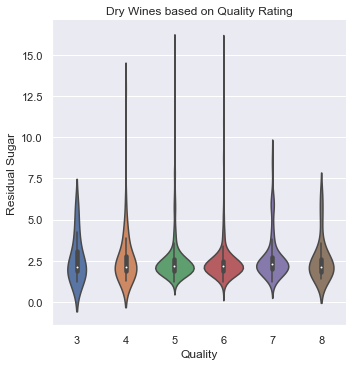

In [20]:
#Dryness in wine is when a wine has no residual sugar
plt.figure(figsize= (10,5))
sns.catplot('quality','residual sugar', kind="violin", data=df)
plt.title('Dry Wines based on Quality Rating')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar');
# no discerning relation to quality

Sugar and Alcohol mix well together

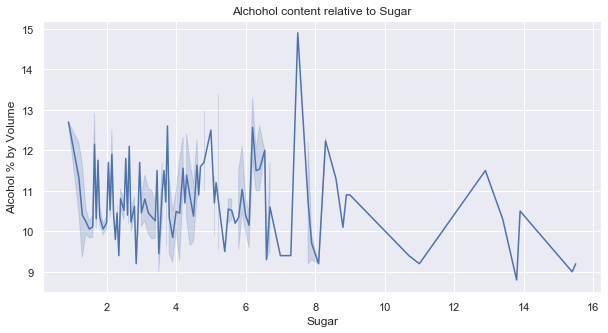

In [21]:
# Create a lineplot to view the higher level of sugar (dryness) relative to alcohol content
plt.figure(figsize= (10,5))
sns.lineplot('residual sugar','alcohol', data=df)
plt.title('Alchohol content relative to Sugar')
plt.xlabel('Sugar')
plt.ylabel('Alcohol % by Volume');
# None, just a misconception

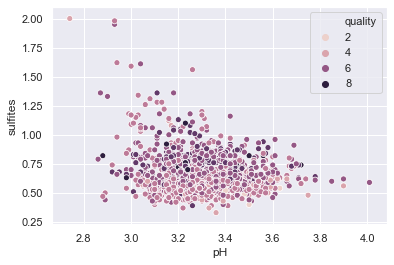

In [22]:
sns.scatterplot('pH','sulfites', hue='quality' ,data = df);

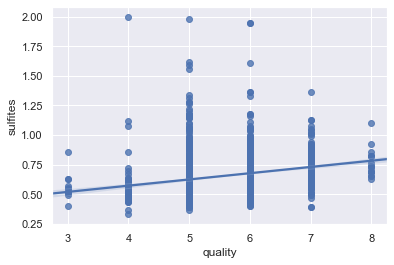

In [23]:
sns.regplot('quality', 'sulfites', data = df)

In [1]:
# Source:
    # http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    The raw code for this IPython notebook is by default hidden for easier reading.
    To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')